# Unlocking Potential
#### Author: Michael Govaerts

In [332]:
# Import sqlite3 for interacting with the local relational database
# Import pandas and numpy for data manipulation and analysis
# Import matplotlib and seaborn for data visualization [Use magic function to ensure inline plotting]

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [333]:
# Ingest the data set

brn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", brn)

In [334]:
#Review data set in tabular form to confirm it has been processed correctly

df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [335]:
# Determine if we need to do any data cleaning by checking if any row contains null values

df.isnull().any().any(), df.shape

(True, (183978, 42))

In [336]:
# Remove the rows with the null values that we identified

# Determine the initial number of rows for comparison purposes
rows = df.shape[0]

# Drop the rows that contain null values
df = df.dropna()

In [337]:
# Confirm that all null values were successfully removed

print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [338]:
# Determine how many rows were removed

rows - df.shape[0]

3624

In [339]:
# Review descriptive statistics of our data to begin our analyses

df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,91995.886274,166822.125803,137653.145514,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,53.001408,49.392783,57.084578,63.453846,67.709405,68.101628,65.995082,66.148297,65.190082,61.866474,66.977333,67.053401,67.432477,53.387560,60.946217,51.897374,55.730730,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,53092.657914,52821.443279,137599.735284,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,18.245476,17.820262,14.412035,15.187692,13.011580,12.585984,12.963670,9.145011,13.076192,16.129537,11.017828,13.200669,12.085131,18.370204,16.101618,19.483338,18.458218,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,46074.250000,156616.000000,35451.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,92003.500000,183792.000000,80291.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,137935.750000,200138.000000,192841.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [340]:
# Review data to determine if there are any columns we want to omit before going deeper into our analysis

df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [341]:
# Drop id, api_id and date columns, as they don't add much to our analyses of the player attributes
df2 = df.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date'], axis=1)

# Remove column display limitations and review dataframe
pd.set_option('display.max_columns', None)
df2.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [342]:
# Identify any clear correlations in tabular form

df2.corr()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,0.354191,0.357566,0.349800,0.434525,0.443991,0.243998,0.253048,0.239963,0.771856,0.160211,0.428053,0.258978,0.325606,0.315684,0.392668,0.322782,0.249094,0.368978,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,0.339978,0.296050,0.262842,0.343133,0.401803,0.338820,0.340698,0.293714,0.580991,0.202232,0.325459,0.174532,0.259432,0.122392,0.313059,0.162137,0.163292,0.326898,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,0.809747,0.788924,0.708763,0.685649,0.807721,0.599439,0.579506,0.599561,0.384999,0.519778,0.656740,0.021270,0.565935,-0.072915,0.716515,0.324625,0.306446,0.684803,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,0.784988,0.691082,0.633274,0.341121,0.720694,0.529355,0.509647,0.554396,0.354769,0.394978,0.727835,0.008948,0.347853,-0.054596,0.806895,0.044465,-0.152560,0.803687,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,0.400803,0.320384,0.306013,0.362741,0.550956,0.198164,0.265430,0.068570,0.295601,0.077255,0.541365,0.286305,0.477830,0.493543,0.406003,0.577304,0.454187,0.408972,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,0.788935,0.731948,0.693490,0.803073,0.890622,0.502893,0.490562,0.510650,0.460469,0.462617,0.722320,0.060067,0.611422,0.089782,0.729741,0.455426,0.425764,0.679014,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,0.784247,0.752410,0.682909,0.414520,0.749459,0.512931,0.493721,0.560021,0.397448,0.416578,0.746622,0.023143,0.382636,-0.037103,0.814894,0.127425,-0.038534,0.779166,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267
dribbling,0.354191,0.339978,0.809747,0.784988,0.400803,0.788935,0.784247,1.000000,0.810353,0.707322,0.579201,0.901730,0.698906,0.669779,0.703528,0.377852,0.547666,0.744960,0.008645,0.527134,-0.114107,0.807175,0.204592,0.106897,0.798720,0.734119,0.663420,0.004345,0.067306,0.044988,-0.654097,-0.650645,-0.432452,-0.653560,-0.656195
curve,0.357566,0.296050,0.788924,0.691082,0.320384,0.731948,0.752410,0.810353,1.000000,0.797842,0.586313,0.798598,0.549135,0.516366,0.619243,0.392756,0.494479,0.694945,-0.017059,0.454458,-0.115739,0.783732,0.203332,0.136119,0.721106,0.728198,0.649737,0.032956,0.094466,0.080110,-0.556625,-0.544940,-0.333784,-0.549870,-0.551574
free_kick_accuracy,0.349800,0.262842,0.708763,0.633274,0.306013,0.693490,0.682909,0.707322,0.797842,1.000000,0.603286,0.720674,0.430657,0.394006,0.505257,0.369191,0.431480,0.684191,-0.033555,0.416764,-0.059102,0.773887,0.232394,0.176245,0.656253,0.697943,0.669018,0.072918,0.133147,0.105894,-0.498347,-0.491631,-0.279713,-0.494253,-0.495868


In [343]:
# It's not easy to see the correlations in tabular form.  Since player potential and player rating are our key
# attributes to measure correlations with, let's just visualize those correlations against the other player attributes

df2.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [344]:
#Create a list of features to correlate with player potential and rating

Comps = ['crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [345]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in list

correlations1 = [ df2['overall_rating'].corr(df2[f]) for f in Comps ]

In [346]:
#Confirm that the number of correlations we calculated match the number of features we wanted to correlate

len(correlations1), len(Comps)

(33, 33)

In [347]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df2, y_label):  
    color='blue'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label, fontsize=20)
    plt.yticks(fontsize=18)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=85, fontsize=20);
    plt.grid()
    plt.show()

In [348]:
# create an overall_rating dataframe using our Comps and correlations1 lists

df3 = pd.DataFrame({'attributes': Comps, 'correlation': correlations1})

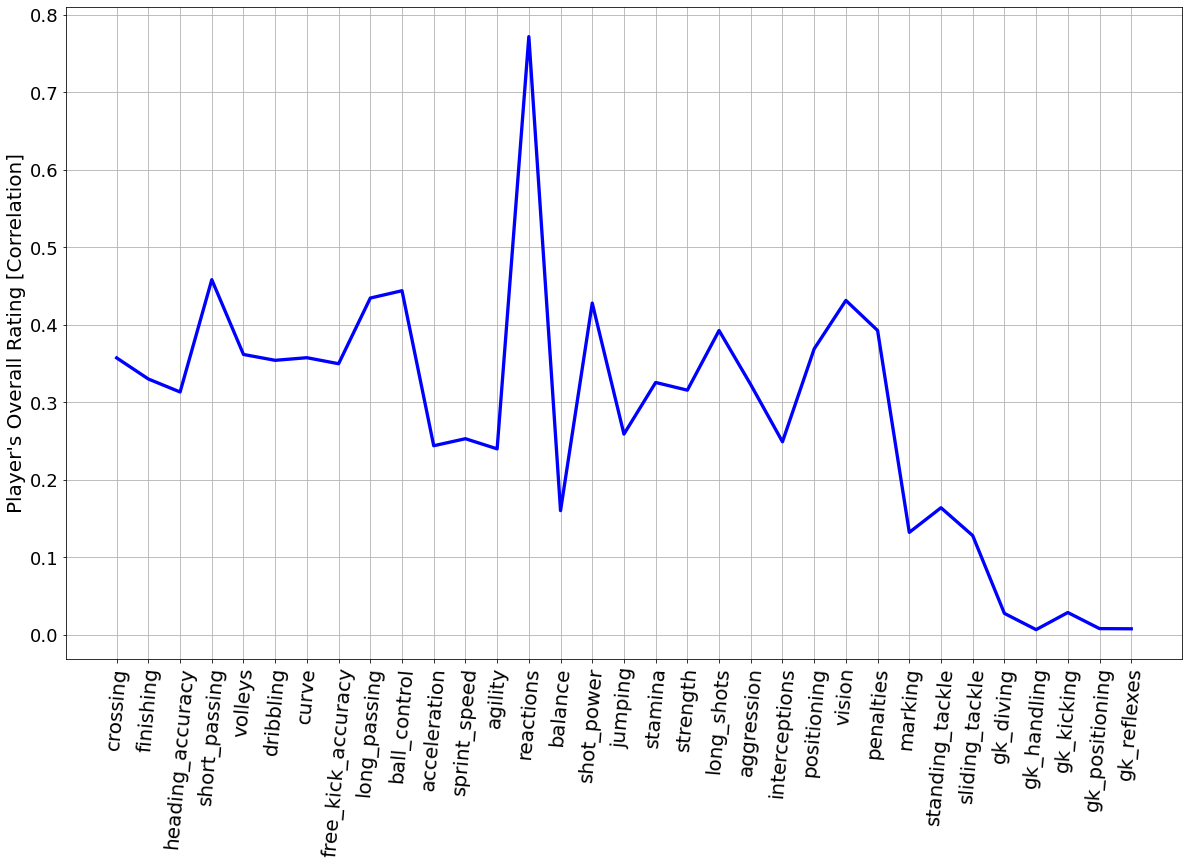

In [349]:
# Plot the above dataframe using the created function
    
plot_dataframe(df3, 'Player\'s Overall Rating [Correlation]')

In [350]:
##From the graph above, the attributes with the strongest correlations to a player's rating are 
## reactions (0.771856), short_passing (0.458243), ball_control (0.44391), long_passing (0.434525), 
## vision (0.431493), and shot_power (0.428053)

strong1 = ['reactions','short_passing', 'ball_control','long_passing','vision','shot_power']

In [351]:
#List correlations to confirm our conclusions

for f in strong1:
    related = df2['overall_rating'].corr(df2[f])
    print("%s: %f" % (f,related))

reactions: 0.771856
short_passing: 0.458243
ball_control: 0.443991
long_passing: 0.434525
vision: 0.431493
shot_power: 0.428053


In [352]:
# Let's now repeat the process for Player Potential rating to see if the correlations are similar

# create a list containing Pearson's correlation between 'potential' with each column in list

correlations2 = [ df2['potential'].corr(df2[f]) for f in Comps ]

In [353]:
#Confirm that the number of correlations we calculated match the number of features we wanted to correlate

len(correlations2), len(Comps)

(33, 33)

In [354]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe2(df2, y_label):  
    color='green'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label, fontsize=20)
    plt.yticks(fontsize=18)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=85, fontsize=20);
    plt.grid()
    plt.show()

In [355]:
#create a dataframe using our Comps and correlations2 lists

df4 = pd.DataFrame({'attributes': Comps, 'correlation': correlations2})

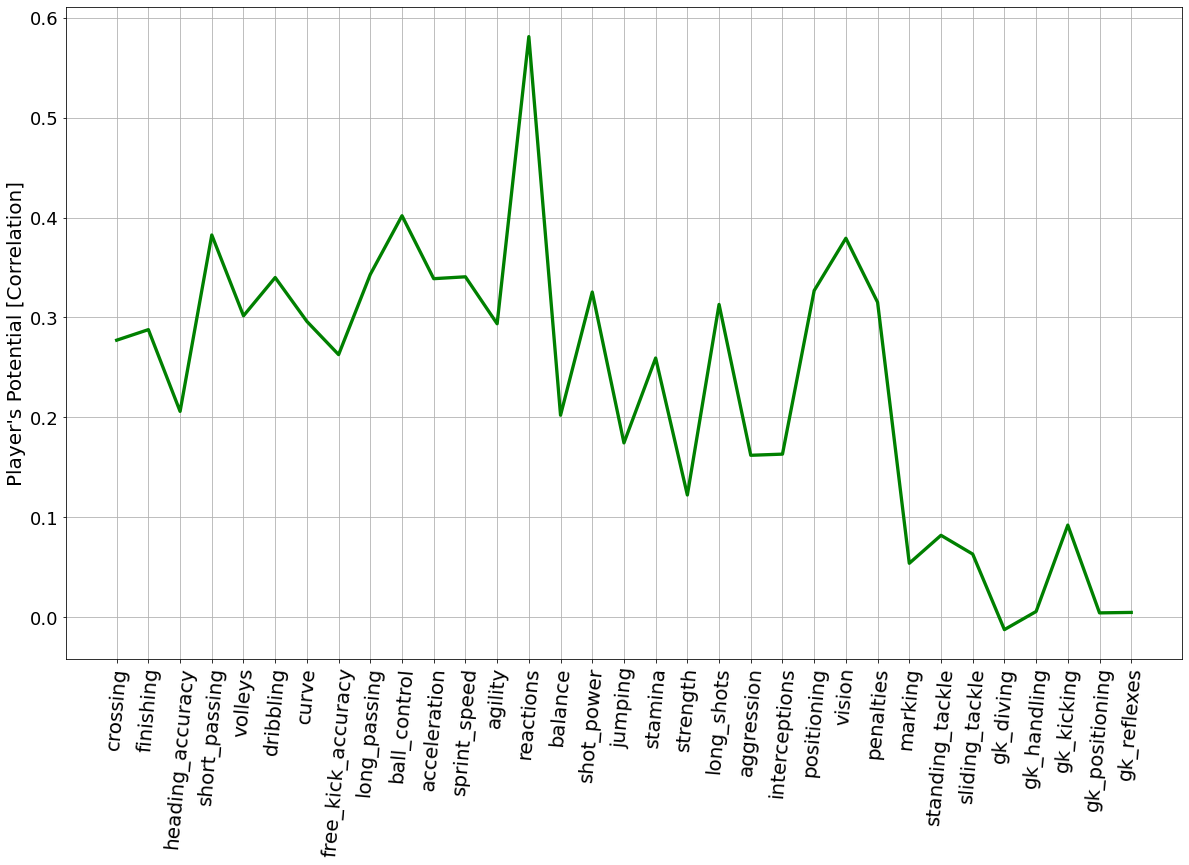

In [356]:
# Plot the 'potential' dataframe, above, using the function we created 

plot_dataframe2(df4, 'Player\'s Potential [Correlation]')

In [357]:
#From the potential graph above, list the attributes with the strongest correlations to a player's potential

strong2 = ['reactions','ball_control','vision','short_passing','long_passing', 'positioning', 'penalties', 'shot_power']

In [358]:
#List correlations to confirm our conclusions

for f in strong2:
    related = df2['potential'].corr(df2[f])
    print("%s: %f" % (f,related))

reactions: 0.580991
ball_control: 0.401803
vision: 0.379278
short_passing: 0.382538
long_passing: 0.343133
positioning: 0.326898
penalties: 0.315207
shot_power: 0.325459


In [359]:
# Create and display a correlation heatmap of highly correlated attributes to player potential and player rating
# by eliminating other attributes from the correlation

import seaborn as sns

corr_df2=df2.corr()
heatmap_df3=corr_df2.drop(['crossing', 'finishing', 'heading_accuracy','volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                           'acceleration', 'sprint_speed','agility', 'balance', 'jumping', 'stamina',
        'strength', 'long_shots', 'aggression', 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']).drop(['crossing', 'finishing', 'heading_accuracy',
'volleys', 'dribbling', 'curve', 'free_kick_accuracy',  'acceleration', 'sprint_speed',
       'agility', 'balance', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],axis=1)

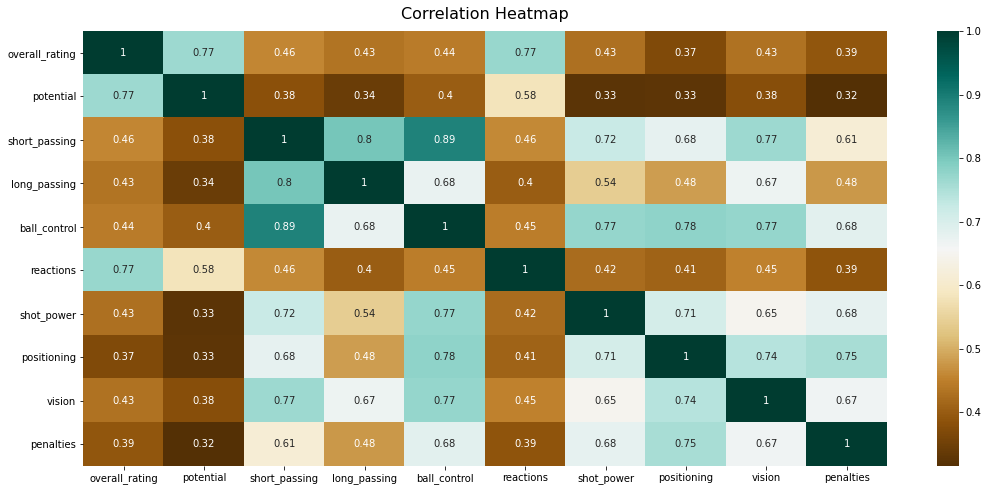

In [363]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(heatmap_df3,annot=True, cmap='BrBG',)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

# Return to Presentation and Report Findings